# Assignment No 3


In [70]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

### Provide summary statistics (mean, median, minimum, maximum, standard deviation) for a dataset (age, income etc.) with numeric variables grouped by one of the qualitative (categorical) variable. For example, if your categorical variable is age groups and quantitative variable is income, then provide summary statistics of income grouped by the age groups. Create a list that contains a numeric value for each response to the categorical variable.

In [2]:
df =  pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<Figure size 1600x500 with 0 Axes>

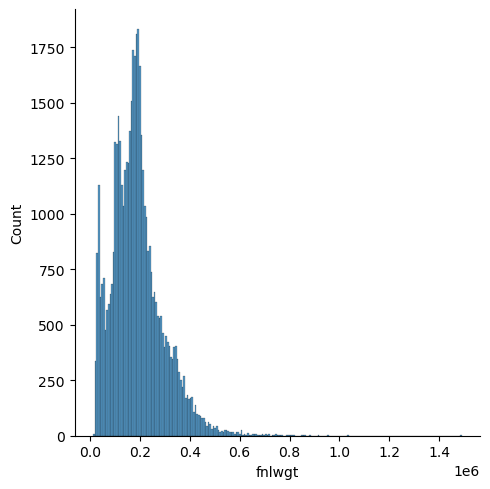

In [75]:
plt.figure(figsize=(16,5))
sns.displot(df['fnlwgt'])
plt.show()

In [4]:
numeric_data = df.select_dtypes(int,float)

In [5]:
numeric_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [8]:
numeric_data['age'].mean()


40.422382375824085

In [9]:
numeric_data['fnlwgt'].mean()


189664.13459727284

In [10]:
numeric_data.mean()


age                    38.643585
fnlwgt             189664.134597
educational-num        10.078089
capital-gain         1079.067626
capital-loss           87.502314
hours-per-week         40.422382
dtype: float64

In [12]:
numeric_data['age'].median()

37.0

In [13]:
numeric_data.median()

age                    37.0
fnlwgt             178144.5
educational-num        10.0
capital-gain            0.0
capital-loss            0.0
hours-per-week         40.0
dtype: float64

In [19]:
# Mode of particular column
numeric_data.mode()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,36,203488,9,0,0,40


In [20]:
numeric_data['age'].mode()

0    36
Name: age, dtype: int64

In [15]:
# maximum value from perticular column
numeric_data['age'].max()

90

In [16]:
numeric_data.max()

age                     90
fnlwgt             1490400
educational-num         16
capital-gain         99999
capital-loss          4356
hours-per-week          99
dtype: int64

In [17]:
# minimum from particular column
numeric_data['age'].min()

17

In [21]:
numeric_data.min()

age                   17
fnlwgt             12285
educational-num        1
capital-gain           0
capital-loss           0
hours-per-week         1
dtype: int64

In [22]:
# standard deviation of values in particular column

numeric_data['age'].std()

13.71050993444322

In [23]:
numeric_data.std()

age                    13.710510
fnlwgt             105604.025423
educational-num         2.570973
capital-gain         7452.019058
capital-loss          403.004552
hours-per-week         12.391444
dtype: float64

In [26]:
# varience of values in particular column
numeric_data['age'].var()

187.97808266246622

In [28]:
numeric_data.var()

age                1.879781e+02
fnlwgt             1.115221e+10
educational-num    6.609901e+00
capital-gain       5.553259e+07
capital-loss       1.624127e+05
hours-per-week     1.535479e+02
dtype: float64

In [29]:
numeric_data.skew()

age                 0.557580
fnlwgt              1.438892
educational-num    -0.316525
capital-gain       11.894659
capital-loss        4.569809
hours-per-week      0.238750
dtype: float64

### group by 

In [33]:
df.groupby(['income','age']).count()

workclass  fnlwgt  education  educational-num  marital-status  \
income age                                                                  
<=50K  17         595     595        595              595             595   
       18         862     862        862              862             862   
       19        1050    1050       1050             1050            1050   
       20        1112    1112       1112             1112            1112   
       21        1090    1090       1090             1090            1090   
...               ...     ...        ...              ...             ...   
>50K   83           2       2          2                2               2   
       84           1       1          1                1               1   
       85           1       1          1                1               1   
       88           1       1          1                1               1   
       90          13      13         13               13              13   

            occupation  relationship  race  gender  capital-gain  \
income age                                                         
<=50K  17          595           595   595     595           595   
       18          862           862   862     862           862   
       19         1050          1050  1050    1050          1050   
       20         1112          1112  1112    1112          1112   
       21         1090          1090  1090    1090          1090   
...                ...           ...   ...     ...           ...   
>50K   83            2             2     2       2             2   
       84            1             1     1       1             1   
       85            1             1     1       1             1   
       88            1             1     1       1             1   
       90           13            13    13      13            13   

            capital-loss  hours-per-week  native-country  
income age                                                
<=50K  17            595             595             595  
       18            862             862             862  
       19           1050            1050            1050  
       20           1112            1112            1112  
       21           1090            1090            1090  
...                  ...             ...             ...  
>50K   83              2               2               2  
       84              1               1               1  
       85              1               1               1  
       88              1               1               1  
       90             13              13              13  

[142 rows x 13 columns]

In [43]:
df.groupby(['income','age']).mean()

C:\Users\gadad\AppData\Local\Temp\ipykernel_4432\1623250889.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['income','age']).mean()


fnlwgt  educational-num  capital-gain  capital-loss  \
income age                                                               
<=50K  17   179157.852101         6.685714     81.245378     33.302521   
       18   193421.075406         8.220418     76.163573     37.852668   
       19   204866.963810         9.091429     99.438095     42.700952   
       20   197962.343525         9.342626     66.997302     35.776079   
       21   199808.269725         9.424771     71.880734     41.124771   
...                   ...              ...           ...           ...   
>50K   83   196666.500000         9.500000  10025.500000   1196.000000   
       84   172907.000000        10.000000      0.000000      0.000000   
       85   155981.000000        13.000000      0.000000      0.000000   
       88   263569.000000         7.000000   6418.000000      0.000000   
       90   160300.076923        12.153846   7438.461538    140.384615   

            hours-per-week  
income age                  
<=50K  17        21.137815  
       18        25.745940  
       19        30.533333  
       20        32.429856  
       21        34.194495  
...                    ...  
>50K   83        52.500000  
       84        35.000000  
       85        40.000000  
       88        40.000000  
       90        45.153846  

[142 rows x 5 columns]

In [46]:
df.groupby(['income','age']).median()

C:\Users\gadad\AppData\Local\Temp\ipykernel_4432\3033560346.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['income','age']).median()


fnlwgt  educational-num  capital-gain  capital-loss  \
income age                                                          
<=50K  17   167658.0              7.0           0.0           0.0   
       18   177613.0              9.0           0.0           0.0   
       19   192307.5              9.0           0.0           0.0   
       20   190281.5             10.0           0.0           0.0   
       21   190057.5             10.0           0.0           0.0   
...              ...              ...           ...           ...   
>50K   83   196666.5              9.5       10025.5        1196.0   
       84   172907.0             10.0           0.0           0.0   
       85   155981.0             13.0           0.0           0.0   
       88   263569.0              7.0        6418.0           0.0   
       90   175491.0             13.0        6097.0           0.0   

            hours-per-week  
income age                  
<=50K  17             20.0  
       18             24.0  
       19             30.0  
       20             35.0  
       21             40.0  
...                    ...  
>50K   83             52.5  
       84             35.0  
       85             40.0  
       88             40.0  
       90             45.0  

[142 rows x 5 columns]

In [47]:
df.groupby(['income','age']).std()

C:\Users\gadad\AppData\Local\Temp\ipykernel_4432\378296505.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['income','age']).std()


fnlwgt  educational-num  capital-gain  capital-loss  \
income age                                                               
<=50K  17   101243.296009         0.957188   1407.535432    232.467309   
       18   112046.448155         1.437882   1194.025643    245.870731   
       19   116351.515261         1.394263   1515.336478    269.259342   
       20   105724.045468         1.314072   1070.613636    250.178117   
       21   107995.818286         1.476579    477.993196    271.679717   
...                   ...              ...           ...           ...   
>50K   83    61494.955439         4.949747  14178.198070   1691.399421   
       84             NaN              NaN           NaN           NaN   
       85             NaN              NaN           NaN           NaN   
       88             NaN              NaN           NaN           NaN   
       90    78487.937923         2.375084   8349.509253    506.163929   

            hours-per-week  
income age                  
<=50K  17        10.052279  
       18        11.599559  
       19        11.961223  
       20        11.591010  
       21        11.649644  
...                    ...  
>50K   83         3.535534  
       84              NaN  
       85              NaN  
       88              NaN  
       90        13.082088  

[142 rows x 5 columns]

### Write a Python program to display some basic statistical details like percentile, mean, standard deviation etc. of the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-versicolor’ of iris.csv dataset.

In [51]:
df2=pd.read_csv('iris.csv')

In [52]:
df2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
df2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [54]:
df2.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [55]:
df2.groupby(['Species']).mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [57]:
df3 = df2.groupby(['Species'])

In [59]:
df3.describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm         ... PetalLengthCm      PetalWidthCm  \
                        count   mean  ...           75%  max        count   
Species                               ...                                   
Iris-setosa              50.0  5.006  ...         1.575  1.9         50.0   
Iris-versicolor          50.0  5.936  ...         4.600  5.1         50.0   
Iris-virginica           50.0  6.588  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

In [63]:
df2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [64]:
df2.shape

(150, 6)

In [65]:
df2.size

900

In [74]:
df2.quantile(0.25)

C:\Users\gadad\AppData\Local\Temp\ipykernel_4432\898561981.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.quantile(0.25)


Id               38.25
SepalLengthCm     5.10
SepalWidthCm      2.80
PetalLengthCm     1.60
PetalWidthCm      0.30
Name: 0.25, dtype: float64

<Figure size 1600x500 with 0 Axes>

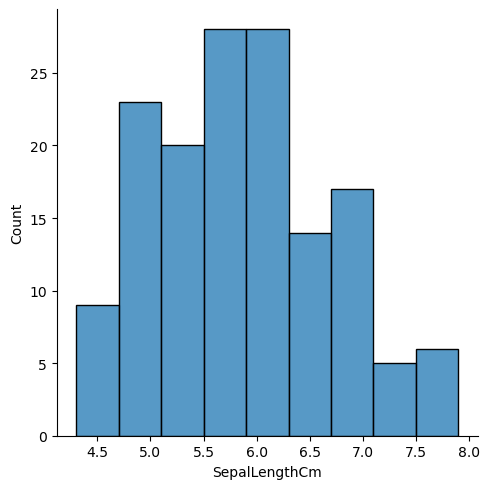

In [73]:
plt.figure(figsize=(16,5))
sns.displot(df2['SepalLengthCm'])
plt.show()